<a href="https://colab.research.google.com/github/tunip0067/NLP_2023/blob/main/1209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.mkdir("txtdata")

In [3]:
!pip install corpus-toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.0 MB/s eta 0:00:00


In [4]:
url="https://raw.githubusercontent.com/tunip0067/Temp_data/main/PG_Aesop_NoQuotesAllText.txt"
#When you copy and paste, i) go to the repository of your/someone else's github, ii) click on a txt file of your interest, iii) click on <raw> icon around at the top right hand corner, and iii) copy & paste the url staring with "https://raw.githubusercontent.com/..."


os.system("curl " + url + " > txtdata.txt") #This moves the whole text of the url to the txtdata folder.

file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close()

In [6]:
from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata")
tok_corp = ct.tokenize(mydata)
for token in tok_corp:
  print(token)

count = len(token)
print(count)

Processing txtdata.txt (1 of 1 files)
['there', 'be', 'once', 'a', 'little', 'kid', 'whose', 'grow', 'horn', 'make', 'he', 'think', 'he', 'be', 'a', 'grown-up', 'billy', 'goat', 'and', 'able', 'to', 'take', 'care', 'of', 'himself', 'so', 'one', 'even', 'when', 'the', 'flock', 'start', 'home', 'from', 'the', 'pasture', 'and', 'he', 'mother', 'call', 'the', 'kid', 'pay', 'no', 'heed', 'and', 'keep', 'right', 'on', 'nibble', 'the', 'tender', 'grass', 'a', 'little', 'late', 'when', 'he', 'lift', 'he', 'head', 'the', 'flock', 'be', 'go', 'he', 'be', 'all', 'alone', 'the', 'sun', 'be', 'sink', 'long', 'shadow', 'come', 'creep', 'over', 'the', 'ground', 'a', 'chilly', 'little', 'wind', 'come', 'creep', 'with', 'they', 'make', 'scary', 'noise', 'in', 'the', 'grass', 'the', 'kid', 'shiver', 'a', 'he', 'think', 'of', 'the', 'terrible', 'wolf', 'then', 'he', 'start', 'wildly', 'over', 'the', 'field', 'bleat', 'for', 'he', 'mother', 'but', 'not', 'half-way', 'near', 'a', 'clump', 'of', 'tree', 'th

In [7]:
mydata = ct.frequency(mydata)

In [8]:
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing txtdata.txt (1 of 1 files)


In [9]:
tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing 1.txt (1 of 1 files)
the_DET	1911
a_DET	832
be_AUX	831
and_CCONJ	775
he_PRON	761
to_PART	566
of_ADP	504
his_PRON	360
in_ADP	353
you_PRON	313


In [10]:
type(tagged_freq)

dict

In [11]:
import pandas as pd

In [12]:
data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
print(data_list)

[('there_PRON', 39), ('be_VERB', 32), ('once_ADV', 34), ('a_DET', 832), ('little_ADJ', 42), ('kid_NOUN', 4), ('whose_DET', 8), ('grow_VERB', 14), ('horn_NOUN', 20), ('make_VERB', 97), ('he_PRON', 761), ('think_VERB', 50), ('be_AUX', 831), ('grown_NOUN', 1), ('up_ADP', 102), ('Billy_PROPN', 1), ('Goat_PROPN', 19), ('and_CCONJ', 775), ('able_ADJ', 9), ('to_PART', 566), ('take_VERB', 58), ('care_NOUN', 12), ('of_ADP', 504), ('himself_PRON', 48), ('so_ADV', 141), ('one_NUM', 128), ('evening_NOUN', 14), ('when_SCONJ', 123), ('the_DET', 1911), ('flock_NOUN', 14), ('start_VERB', 9), ('home_ADV', 8), ('from_ADP', 83), ('pasture_NOUN', 11), ('his_PRON', 360), ('mother_NOUN', 11), ('call_VERB', 27), ('Kid_PROPN', 10), ('pay_VERB', 8), ('no_DET', 39), ('heed_NOUN', 1), ('keep_VERB', 33), ('right_ADV', 7), ('on_ADP', 133), ('nibble_VERB', 4), ('tender_ADJ', 5), ('grass_NOUN', 7), ('later_ADV', 9), ('lift_VERB', 3), ('head_NOUN', 42), ('go_VERB', 72), ('all_ADV', 19), ('alone_ADJ', 2), ('sun_NOUN',

In [13]:
df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

                Tagged  Freq
0           there_PRON    39
1              be_VERB    32
2             once_ADV    34
3                a_DET   832
4           little_ADJ    42
...                ...   ...
2995       circle_VERB     1
2996     boasting_NOUN     1
2997  chanticleer_NOUN     1
2998        rival_NOUN     1
2999       Pride_PROPN     1

[3000 rows x 2 columns]


In [14]:
tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

3000
['there', 'be', 'once', 'a', 'little', 'kid', 'whose', 'grow', 'horn', 'make']
['PRON', 'VERB', 'ADV', 'DET', 'ADJ', 'NOUN', 'DET', 'VERB', 'NOUN', 'VERB']


In [16]:
df["POS"] = pos
df["Word"] = word

cols = ["POS","Word","Freq"]
df = df[cols]

df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  3000


,POS,Word,Freq
1615,X,nearer,1
2400,X,ass,1
88,VERB,say,158
402,VERB,have,122
184,VERB,see,112


In [17]:
df1 = df[df["POS"] == "VERB"]
print(len(df1))


freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

690
690
690
20695
say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have 

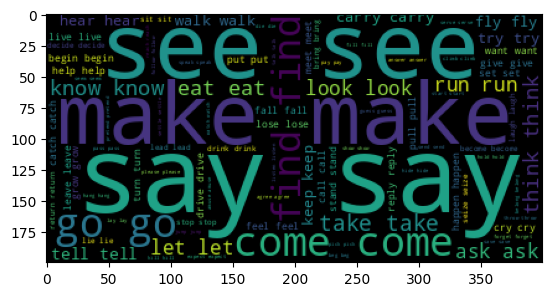

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2))
plt.imshow(wc)

1169
       POS         Word  Freq
211   NOUN          day    74
451   NOUN         time    63
49    NOUN         head    42
80    NOUN          way    33
311   NOUN        water    32
...    ...          ...   ...
2986  NOUN      thicket     1
2992  NOUN         gain     1
2996  NOUN     boasting     1
2997  NOUN  chanticleer     1
2998  NOUN        rival     1

[1169 rows x 3 columns]


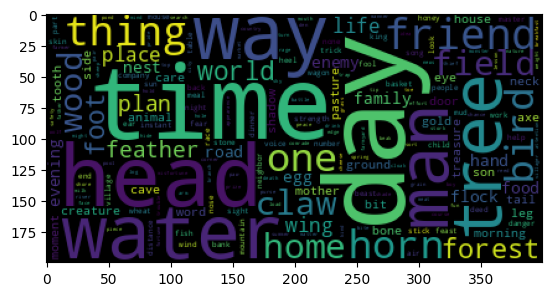

In [21]:
pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)